# Hotel booking demand

İnsanlar her tatile çıktıklarında rezervasyon yaptırmak için uygun bir otel arıyor ve girişimciler de piyasadaki en iyi otel seçeneklerini sunmaya ve otellerini müşteriler için daha cazip hale getirmeye çalışıyor. Oda rezervasyonlarının iptali, otellerin reytingini ve kar üretimini etkilediği için turizm işletmeleri için büyük bir sorun olabilir.

Bizde bu projede rezervasyonun iptal edilip edilmediğini bulan bir model gelistirecegiz.

<img src="https://www.yaz-tatili.com/wp-content/uploads/rezervasyon-iptalleri.jpg">

<a href="https://www.kaggle.com/competitions/hotel-booking-demand-3/data">Dataya Buradan Erieşbilirsiniz</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",100)

import warnings
warnings.filterwarnings("ignore")

### EDA

In [2]:
df=pd.read_csv("train_final.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,3,2016,February,7,12,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,F,0,No Deposit,0,Transient,81.0,1,0,2016-02-14
1,City Hotel,1,50,2016,November,47,18,1,2,2,0.0,0,BB,BEL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,93.6,0,2,2016-10-09
2,City Hotel,0,14,2015,September,37,7,1,5,2,2.0,0,BB,ITA,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,0,Contract,166.0,0,3,2015-09-13
3,City Hotel,0,18,2015,December,50,6,2,0,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,107.0,0,0,2015-12-08
4,City Hotel,1,263,2016,September,40,29,2,4,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,100.3,0,0,2016-01-18


In [4]:
df.shape

(44638, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44638 entries, 0 to 44637
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           44638 non-null  object 
 1   is_canceled                     44638 non-null  int64  
 2   lead_time                       44638 non-null  int64  
 3   arrival_date_year               44638 non-null  int64  
 4   arrival_date_month              44638 non-null  object 
 5   arrival_date_week_number        44638 non-null  int64  
 6   arrival_date_day_of_month       44638 non-null  int64  
 7   stays_in_weekend_nights         44638 non-null  int64  
 8   stays_in_week_nights            44638 non-null  int64  
 9   adults                          44638 non-null  int64  
 10  children                        44638 non-null  float64
 11  babies                          44638 non-null  int64  
 12  meal                            

In [6]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [7]:
df["hotel"].nunique()

2

In [8]:
df["meal"].value_counts()

meal
BB           34424
HB            5479
SC            4038
Undefined      445
FB             252
Name: count, dtype: int64

In [9]:
df["country"].value_counts()

country
PRT    16999
GBR     4914
FRA     4207
ESP     3382
DEU     2957
       ...  
MRT        1
DMA        1
LCA        1
ETH        1
CAF        1
Name: count, Length: 156, dtype: int64

In [10]:
df["country"].nunique()

156

In [11]:
df["market_segment"].value_counts()

market_segment
Online TA        21325
Offline TA/TO     9085
Groups            6868
Direct            4922
Corporate         2046
Complementary      308
Aviation            84
Name: count, dtype: int64

In [12]:
df["distribution_channel"].value_counts()

distribution_channel
TA/TO        36298
Direct        5722
Corporate     2535
GDS             83
Name: count, dtype: int64

In [13]:
df["reserved_room_type"].value_counts()

reserved_room_type
A    31897
D     7356
E     2488
F     1082
G      784
B      433
C      355
H      241
P        2
Name: count, dtype: int64

In [14]:
df["assigned_room_type"].value_counts()

assigned_room_type
A    27069
D     9838
E     3022
F     1395
G      972
C      909
B      847
H      285
I      170
K      129
P        2
Name: count, dtype: int64

In [15]:
df["deposit_type"].value_counts()

deposit_type
No Deposit    40235
Non Refund     4339
Refundable       64
Name: count, dtype: int64

In [16]:
df["customer_type"].value_counts()

customer_type
Transient          32982
Transient-Party     9826
Contract            1594
Group                236
Name: count, dtype: int64

In [17]:
df["reservation_status_date"].nunique()

890

### Feature Engineering

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [20]:
df["arrival_date_month"]=le.fit_transform(df["arrival_date_month"])

In [21]:
d1={"Resort Hotel":1,"City Hotel":2}

In [22]:
df["hotel"]=df["hotel"].map(d1)

In [23]:
df["meal"]=le.fit_transform(df["meal"])

In [24]:
df["country"]=le.fit_transform(df["country"])

In [25]:
df["market_segment"]=le.fit_transform(df["market_segment"])

In [26]:
df["distribution_channel"]=le.fit_transform(df["distribution_channel"])

In [27]:
df["reserved_room_type"]=le.fit_transform(df["reserved_room_type"])

In [28]:
df["assigned_room_type"]=le.fit_transform(df["assigned_room_type"])

In [29]:
df["deposit_type"]=le.fit_transform(df["deposit_type"])

In [30]:
df["customer_type"]=le.fit_transform(df["customer_type"])

In [31]:
df["reservation_status_date"]=pd.to_datetime(df["reservation_status_date"])

In [32]:
df["month"]=df["reservation_status_date"].dt.month

In [33]:
df["day"]=df["reservation_status_date"].dt.day

In [40]:
df=df.drop("reservation_status_date",axis=1)

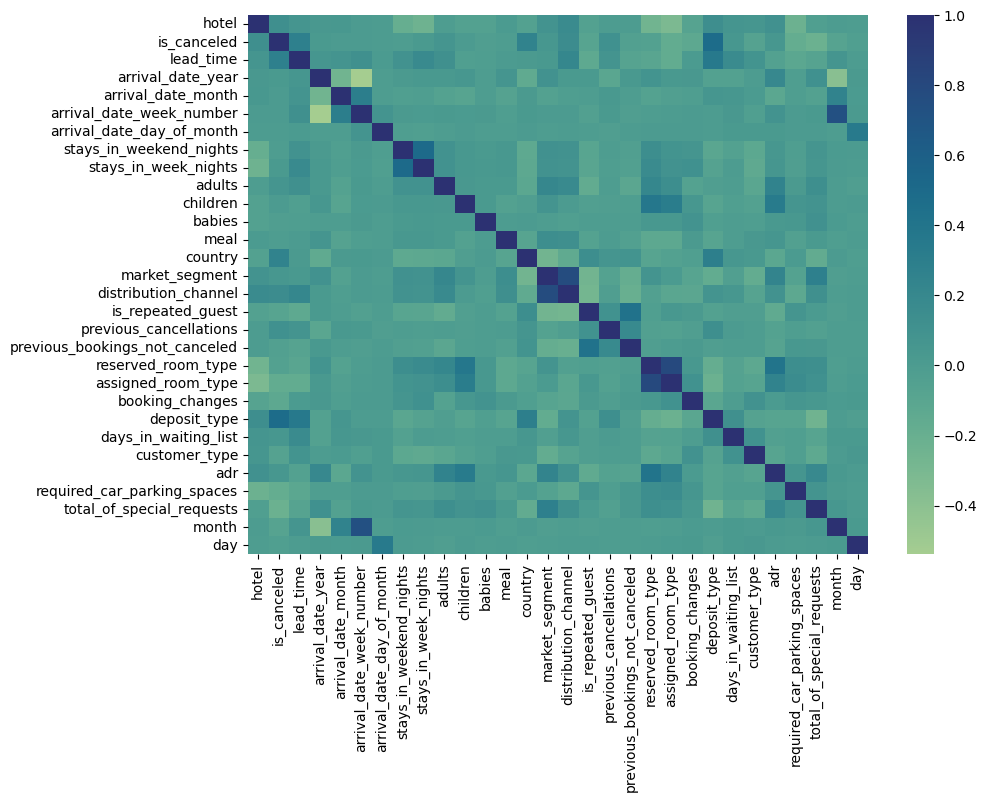

In [41]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True),annot=False, cmap="crest");

<Axes: xlabel='is_canceled', ylabel='count'>

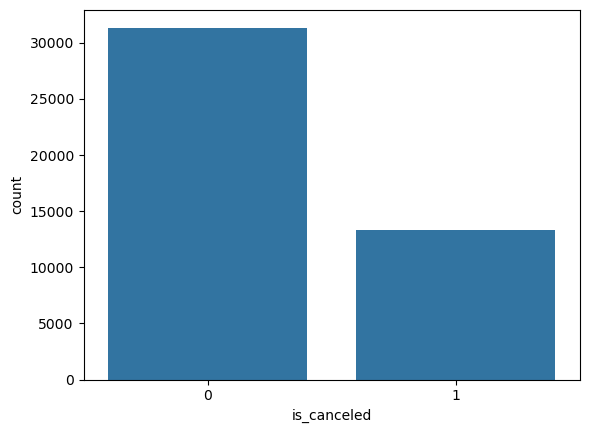

In [45]:
sns.countplot(x=df["is_canceled"])

### Modelling

In [42]:
x=df.drop("is_canceled",axis=1)
y=df["is_canceled"]

In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test_classification(X, y):
    # Bütün sınıflandırma modellerini tanımlıyorum
    lr = LogisticRegression()
    svc = SVC()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier()
    xgb = XGBClassifier()
    mlp = MLPClassifier()

    algos = [lr, svc, knn, dt, rf, gb, xgb, mlp]
    algo_names = ['Logistic Regression', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'MLP']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []

    # Sonuç tablosunu oluşturuyorum
    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=algo_names)

    for algo in algos:
        algo.fit(X_train, y_train)
        y_pred = algo.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))

    # Sonuçları result tablosuna ekliyorum
    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1'] = f1

    # Sonuçları doğruluk oranına göre sıralayıp döndürüyorum
    return result.sort_values('Accuracy', ascending=False)

In [44]:
algo_test_classification(x, y)

,Accuracy,Precision,Recall,F1
XGBoost,0.992496,0.998850,0.976030,0.987308
Random Forest,0.941308,0.981598,0.819101,0.893018
Gradient Boosting,0.930220,0.984382,0.779026,0.869747
Decision Tree,0.928539,0.884266,0.875655,0.879940
KNN,0.842742,0.811823,0.617228,0.701277
Logistic Regression,0.776994,0.703904,0.438951,0.540715
MLP,0.764337,0.573698,0.825094,0.676805
SVC,0.742496,0.796800,0.186517,0.302276


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [47]:
xgb = XGBClassifier()

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
thmn=xgb.predict(x_test)

In [52]:
accuracy_score(y_test, thmn)

0.9924955197132617

<Axes: >

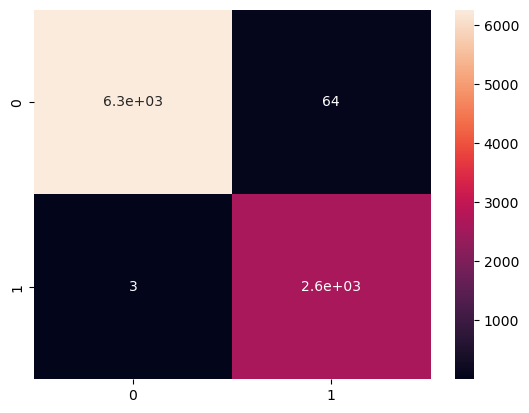

In [53]:
sns.heatmap(confusion_matrix(thmn,y_test),annot=True)

In [54]:
print(classification_report(thmn,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6319
           1       0.98      1.00      0.99      2609

    accuracy                           0.99      8928
   macro avg       0.99      0.99      0.99      8928
weighted avg       0.99      0.99      0.99      8928



In [55]:
import pickle

In [56]:
with open('hotel.pkl', 'wb') as file:
    pickle.dump(xgb, file)

Kaggle daki test dosyamızı yükleyip tahmin ettireceğiz.

In [61]:
test=pd.read_csv("test_final.csv")

In [62]:
test["arrival_date_month"]=le.fit_transform(test["arrival_date_month"])

In [63]:
d1={"Resort Hotel":1,"City Hotel":2}

In [64]:
test["hotel"]=test["hotel"].map(d1)

In [65]:
test["meal"]=le.fit_transform(test["meal"])

In [66]:
test["country"]=le.fit_transform(test["country"])

In [67]:
test["market_segment"]=le.fit_transform(test["market_segment"])

In [68]:
test["distribution_channel"]=le.fit_transform(test["distribution_channel"])

In [69]:
test["reserved_room_type"]=le.fit_transform(test["reserved_room_type"])

In [70]:
test["assigned_room_type"]=le.fit_transform(test["assigned_room_type"])

In [71]:
test["deposit_type"]=le.fit_transform(test["deposit_type"])

In [72]:
test["customer_type"]=le.fit_transform(test["customer_type"])

In [73]:
test["reservation_status_date"]=pd.to_datetime(test["reservation_status_date"])

In [74]:
test["month"]=test["reservation_status_date"].dt.month

In [75]:
test["day"]=test["reservation_status_date"].dt.day

In [76]:
test=test.drop("reservation_status_date",axis=1)

In [77]:
dosya=pd.DataFrame()

In [78]:
dosya["is_canceled"]=xgb.predict(test)

In [82]:
dosya.to_csv("tahmin1.csv",index=True)

In [86]:
dosya=pd.read_csv("tahmin1.csv")

In [87]:
dosya.columns = ["index", "is_canceled"]

In [88]:
dosya.to_csv("tahmin1.csv",index=False)

### Deep Learning

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import normalize, scale

In [90]:
model=Sequential()
model.add(Dense(120,activation="relu"))  # Modele layer ekliyor # Dense bütün nöronlar bütün nöronlara bağlansın demek
model.add(Dense(80,activation="relu")) # 120 nöron var 
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid")) # Binary classification olduğu için sigmoid kullandık ! Regression da yok
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"]) # Loss: hata MSE gibi # Optimizer=adam 

In [91]:
x=scale(x) # hepsini aynı birime getirdik

In [92]:
history=model.fit(x,y,epochs=75,batch_size=23, validation_split=.20, verbose=1)

Epoch 1/75
1553/1553 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8342 - loss: 0.3830 - val_accuracy: 0.9751 - val_loss: 0.0846
Epoch 2/75
1553/1553 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - accuracy: 0.9743 - loss: 0.0815 - val_accuracy: 0.9860 - val_loss: 0.0451
Epoch 3/75
1553/1553 ━━━━━━━━━━━━━━━━━━━━ 2s 959us/step - accuracy: 0.9861 - loss: 0.0440 - val_accuracy: 0.9899 - val_loss: 0.0361
Epoch 4/75
1553/1553 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - accuracy: 0.9904 - loss: 0.0298 - val_accuracy: 0.9906 - val_loss: 0.0287
Epoch 5/75
1553/1553 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step - accuracy: 0.9921 - loss: 0.0242 - val_accuracy: 0.9928 - val_loss: 0.0270
Epoch 6/75
1553/1553 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9933 - loss: 0.0220 - val_accuracy: 0.9948 - val_loss: 0.0192
Epoch 7/75
1553/1553 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - accuracy: 0.9947 - loss: 0.0178 - val_accuracy: 0.9950 - val_loss: 0.0167
Epoch 8/75
1553/1553 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - accuracy: 0.9934 - los

In [93]:
dosya["is_canceled"]=model.predict(test)

736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step


In [94]:
dosya.to_csv("tahmin2.csv",index=False)

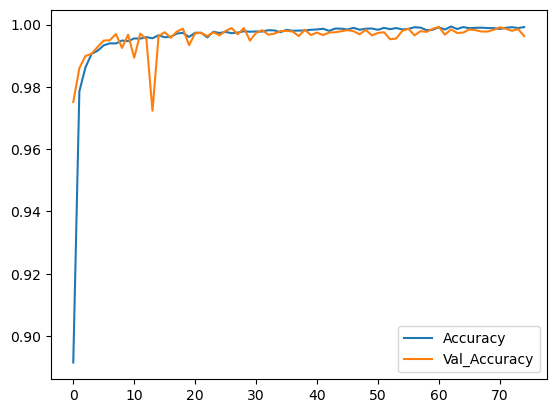

In [95]:
plt.plot(history.history["accuracy"],label="Accuracy")    
plt.plot(history.history["val_accuracy"],label="Val_Accuracy")
plt.legend()

Bu projemizde Müsterilerin otellerdeki rezarvasyonlarını iptal etme olasılıklarını tahmin eden bir model gelistirdik. Modelimizi hem ML hem de DL kullanarak eğittik.